<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARCIAL 4; Metodos computacionales

**Juan Manuel Patiño Daza**

**CC. 1122510764**

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de 8 puntos, Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 13 de marzo a las 10:00 am. Evite el uso de inteligencia artificial y realice un análisis cuidadoso de los errores.



(80 %) En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



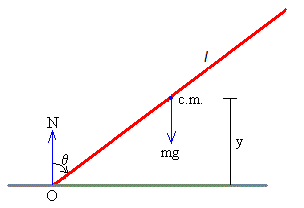


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa del lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una varilla  de masa $m$ y longitud $l$ respecto a un eje perpendicular a la varilla en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la anterior ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?




In [83]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import newton
from scipy.interpolate import CubicSpline
import scipy.integrate as spi
from scipy.optimize import brentq
import sympy as sp

In [59]:
#creamos la funcion
def dy2dt2(y,t,g,l):
  theta, dTetaDt = y
  d2TetaDt = (((2*g)/l)- (dTetaDt**2) * np.cos(theta))/ ((1/3)+ np.sin(theta)**2) * np.sin(theta)
  return [dTetaDt, d2TetaDt]

#condiciones iniciales
g = 9.8 #m/s2
l = 0.1 #m
theta = np.pi/12
dTetaDt = 0
y0 = [theta,dTetaDt]

#definimos el intervalo de tiempo y la solucion de la ecuacion diferencial
t = np.linspace(0,0.5,100)
sol = odeint(dy2dt2, y0, t, args=(g,l))

#definimos la poscicion en cuestion de theta y interpolamos para obtener una funcion a la cual calcularemos raices
y1 = np.cos(sol[:,0]) * (1/2)
ypol = CubicSpline(t,y1)

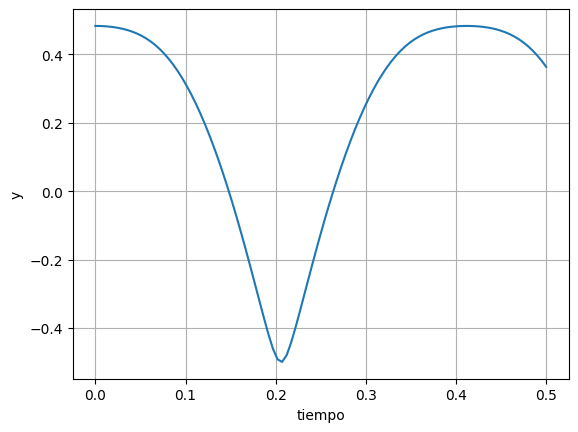

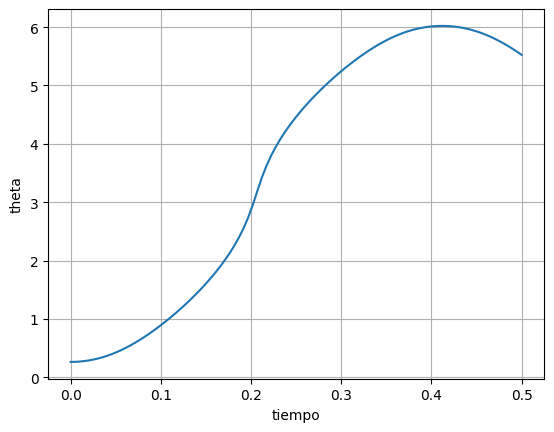

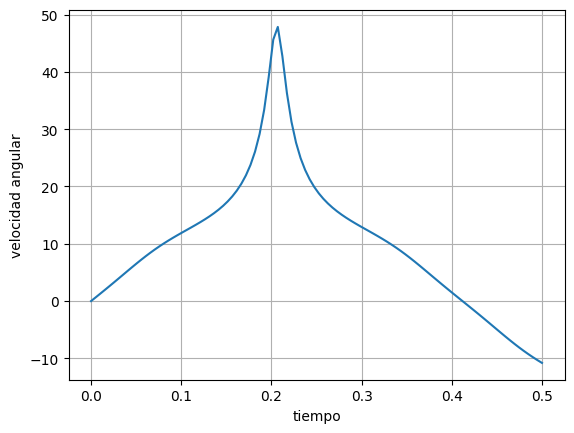

In [32]:
#graficos
plt.plot(t,ypol(t))
plt.xlabel('tiempo')
plt.ylabel('y')
plt.grid()
plt.show()

plt.plot(t,sol[:,0])
plt.xlabel('tiempo')
plt.ylabel('theta')
plt.grid()
plt.show()

plt.plot(t,sol[:,1])
plt.xlabel('tiempo')
plt.ylabel('velocidad angular')
plt.grid()
plt.show()

In [85]:
raiz = brentq(ypol, 0.1, 0.2) #calculamos la raiz
print("El tiempo obtimo seria este:",raiz,"porque es cuando encontramos la raiz")
t = np.linspace(0,0.15,100) #recalibramos t

El tiempo obtimo seria este: 0.1479832305696027 porque es cuando encontramos la raiz


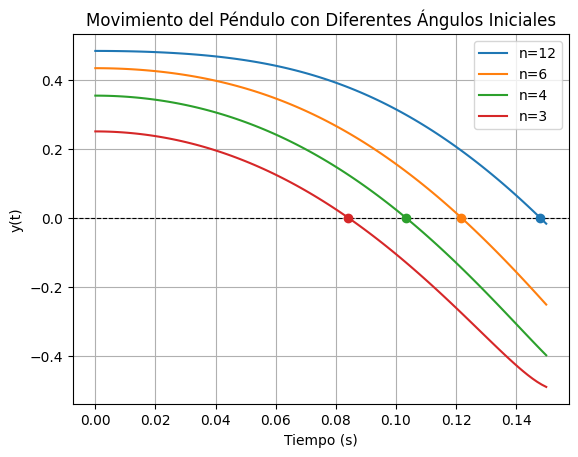

[0.14798323600940572, 0.12177877384550218, 0.10332124451050746, 0.0841600501340034]


In [56]:
#el punto nos pide encontrar las raices y graficar entonces creamos una lista con los angulos a usar
#y un ciclo for que itera grafica y calcula lo mismo que en los puntos anteriores pero en un sollo grafico
# y mas bonito
n=[12,6,4,3]
root= []
for i in n:
  def dy2dt2(y,t,g,l):
    theta, dTetaDt = y
    d2TetaDt = (((2*g)/l)- (dTetaDt**2) * np.cos(theta))/ ((1/3)+ np.sin(theta)**2) * np.sin(theta)
    return [dTetaDt, d2TetaDt]

  #condiciones iniciales
  g = 9.8 #m/s2
  l = 0.1 #m
  theta = np.pi/i
  dTetaDt = 0
  y0 = [theta,dTetaDt]

  t = np.linspace(0,0.15,100)
  sol = odeint(dy2dt2, y0, t, args=(g,l))

  y1 = np.cos(sol[:,0]) * (1/2)
  ypol = CubicSpline(t,y1)
  dypol = ypol.derivative()

  raiz = newton(ypol, 0.07, dypol)
  root.append(raiz)
  plt.plot(t, ypol(t), label=f"n={i}")
  plt.scatter(raiz, 0, marker="o", zorder=3)  # Punto de intersección

plt.xlabel('Tiempo (s)')
plt.ylabel('y(t)')
plt.title('Movimiento del Péndulo con Diferentes Ángulos Iniciales')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Línea en y=0
plt.legend()
plt.grid(True)
plt.show()
print(root)


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

<lambdifygenerated-14>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return sqrt((sin(x)**2 + 0.333333333333333)/(cos(theta) - cos(x)))
<ipython-input-89-b0fb726b7055>:7: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  integral, error = spi.quad(F_lambdified, theta0Num, sp.pi/2, args=(theta0Num,)) #usamos quad para la integral


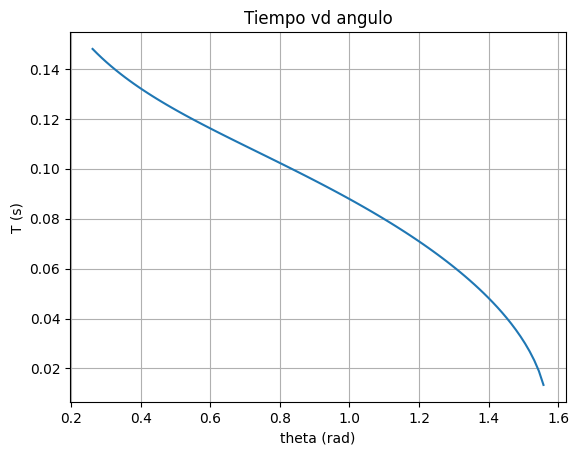

In [89]:
sp.init_printing(use_latex='mathjax') #para que se vea mas bonito
x, theta= sp.symbols('x theta') #definimos variables simbolicas
F = sp.sqrt( (1/3 +sp.sin(x)**2) /  (sp.cos(theta)- sp.cos(x)) ) #definimos lo que va dentro de la integral
F_lambdified = sp.lambdify((x, theta), F, "numpy") #creamos una funcion simbolica

def Tiempo(theta0Num, l=0.1, g=9.8):
    integral, error = spi.quad(F_lambdified, theta0Num, sp.pi/2, args=(theta0Num,)) #usamos quad para la integral
    T = (1/2) * sp.sqrt(l/g) * integral #resolvemos quien es t
    return T

angulos = np.linspace(np.pi/2,np.pi/12, 100) #intervalo a los angulos para hacer el grafico
TCaida= [] #lista donde guardamos el tiempo de caida
for i in angulos:
  TCaida.append(Tiempo(i)) #llenamos la lista con datos segun el intervalo ya creado

#graficamos
plt.plot(angulos,TCaida)
plt.title('Tiempo vd angulo')
plt.xlabel("theta (rad)")
plt.ylabel("T (s)")
plt.grid()
plt.xticks()
plt.show()



### Matrices: Rotación  en el plano, autovalores y autovectores
8 (20%).   Considere la siguiente matrix de rotación:
\begin{bmatrix}
\cos \theta & -\sin \theta\\
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución.

Encontrar los autovalores y autovectores para $\theta=45$.
**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

In [90]:
import sympy as sy

In [155]:
#A
teta = sy.Symbol('teta')
A = sy.Matrix([[sy.cos(teta), -sy.sin(teta)], [sy.sin(teta), sy.cos(teta)]])
poly = A.charpoly()
display(poly.as_expr()) #el display lo usamos pa que todo se vea la pena y valga la media hora intentando usar sympy

 2                    
λ  - 2⋅λ⋅cos(teta) + 1

In [156]:
eigenvalues = A.eigenvals() #calculamos los valores propios

lista_autovalores = list(eigenvalues.keys())  # Convierte las claves del diccionario en una lista
display(lista_autovalores)

⎡    _________________________________                _________________________________            ⎤
⎣- ╲╱ (cos(teta) - 1)⋅(cos(teta) + 1)  + cos(teta), ╲╱ (cos(teta) - 1)⋅(cos(teta) + 1)  + cos(teta)⎦

In [157]:
eigenvectors = A.eigenvects()
display(eigenvectors)

⎡⎛                                                      ⎡⎡     sin(teta)     ⎤⎤⎞  ⎛                ↪
⎢⎜                                                      ⎢⎢───────────────────⎥⎥⎟  ⎜                ↪
⎢⎜    _________________________________                 ⎢⎢   ________________⎥⎥⎟  ⎜  _____________ ↪
⎢⎜- ╲╱ (cos(teta) - 1)⋅(cos(teta) + 1)  + cos(teta), 1, ⎢⎢  ╱    2           ⎥⎥⎟, ⎜╲╱ (cos(teta) - ↪
⎢⎜                                                      ⎢⎢╲╱  cos (teta) - 1 ⎥⎥⎟  ⎜                ↪
⎢⎜                                                      ⎢⎢                   ⎥⎥⎟  ⎜                ↪
⎣⎝                                                      ⎣⎣         1         ⎦⎦⎠  ⎝                ↪

↪                                      ⎡⎡    -sin(teta)     ⎤⎤⎞⎤
↪                                      ⎢⎢───────────────────⎥⎥⎟⎥
↪ ____________________                 ⎢⎢   ________________⎥⎥⎟⎥
↪  1)⋅(cos(teta) + 1)  + cos(teta), 1, ⎢⎢  ╱    2           ⎥⎥⎟⎥
↪                               

In [171]:
D = sy.diag(*lista_autovalores)
print("matriz diagonal")
display(D)

print()
print("matriz de vectores propios")

p = sy.Matrix([[eigenvectors[0][2][0][0], eigenvectors[1][2][0][0]], [eigenvectors[0][1], eigenvectors[1][1]]])
display(p)
print()
print("p inverso")
pinv= p.inv()
display(pinv)
print()

matriz diagonal


⎡    _________________________________                                                             ⎤
⎢- ╲╱ (cos(teta) - 1)⋅(cos(teta) + 1)  + cos(teta)                         0                       ⎥
⎢                                                                                                  ⎥
⎢                                                     _________________________________            ⎥
⎣                        0                          ╲╱ (cos(teta) - 1)⋅(cos(teta) + 1)  + cos(teta)⎦


matriz de vectores propios


⎡     sin(teta)           -sin(teta)     ⎤
⎢───────────────────  ───────────────────⎥
⎢   ________________     ________________⎥
⎢  ╱    2               ╱    2           ⎥
⎢╲╱  cos (teta) - 1   ╲╱  cos (teta) - 1 ⎥
⎢                                        ⎥
⎣         1                    1         ⎦


p inverso


⎡    ________________      ⎤
⎢   ╱    2                 ⎥
⎢ ╲╱  cos (teta) - 1       ⎥
⎢ ───────────────────   1/2⎥
⎢     2⋅sin(teta)          ⎥
⎢                          ⎥
⎢    ________________      ⎥
⎢   ╱    2                 ⎥
⎢-╲╱  cos (teta) - 1       ⎥
⎢─────────────────────  1/2⎥
⎣     2⋅sin(teta)          ⎦

In [169]:
print(eigenvectors[][2][0][0])

-sin(teta)/sqrt(cos(teta)**2 - 1)


In [175]:
#calculo para matrics de 45 grados
A45 = A.subs(teta, np.pi/4)
display(A45)
print()
eigenvalues = A45.eigenvals() #calculamos los valores propios

lista_autovalores = list(eigenvalues.keys())  # Convierte las claves del diccionario en una lista
display(lista_autovalores)

print()
eigenvectors = A45.eigenvects()
display(eigenvectors)

D = sy.diag(*lista_autovalores)
print("matriz diagonal")
display(D)

print()
print("matriz de vectores propios")

p = sy.Matrix([[eigenvectors[0][2][0][0], eigenvectors[1][2][0][0]], [eigenvectors[0][1], eigenvectors[1][1]]])
display(p)
print()
print("p inverso")
pinv= p.inv()
display(pinv)
print()

comprobacion = p*D*pinv
display(comprobacion)

⎡0.707106781186548  -0.707106781186547⎤
⎢                                     ⎥
⎣0.707106781186547  0.707106781186548 ⎦

[0.707106781186548 - 0.707106781186547⋅ⅈ, 0.707106781186548 + 0.707106781186547⋅ⅈ]

⎡⎛                                            ⎡⎡-0.707106781186548⋅ⅈ⎤⎤⎞  ⎛                         ↪
⎢⎜0.707106781186548 - 0.707106781186547⋅ⅈ, 1, ⎢⎢                    ⎥⎥⎟, ⎜0.707106781186548 + 0.70 ↪
⎣⎝                                            ⎣⎣ 0.707106781186548  ⎦⎦⎠  ⎝                         ↪

↪                     ⎡⎡-0.707106781186548 ⎤⎤⎞⎤
↪ 7106781186547⋅ⅈ, 1, ⎢⎢                   ⎥⎥⎟⎥
↪                     ⎣⎣0.707106781186548⋅ⅈ⎦⎦⎠⎦

matriz diagonal


⎡0.707106781186548 - 0.707106781186547⋅ⅈ                     0                   ⎤
⎢                                                                                ⎥
⎣                   0                     0.707106781186548 + 0.707106781186547⋅ⅈ⎦


matriz de vectores propios


⎡-0.707106781186548⋅ⅈ  -0.707106781186548⎤
⎢                                        ⎥
⎣         1                    1         ⎦


p inverso


⎡0.707106781186547 + 0.707106781186547⋅ⅈ   0.5 + 0.5⋅ⅈ⎤
⎢                                                     ⎥
⎣-0.707106781186547 - 0.707106781186547⋅ⅈ  0.5 - 0.5⋅ⅈ⎦

⎡   -0.707106781186548⋅ⅈ⋅(0.707106781186547 + 0.707106781186547⋅ⅈ)⋅(0.707106781186548 - 0.70710678 ↪
⎢                                                                                                  ↪
⎣(-0.707106781186547 - 0.707106781186547⋅ⅈ)⋅(0.707106781186548 + 0.707106781186547⋅ⅈ) + (0.7071067 ↪

↪ 1186547⋅ⅈ) + (-0.707106781186547 - 0.707106781186547⋅ⅈ)⋅(-0.5 - 0.5⋅ⅈ)        -0.707106781186548 ↪
↪                                                                                                  ↪
↪ 81186547 + 0.707106781186547⋅ⅈ)⋅(0.707106781186548 - 0.707106781186547⋅ⅈ)  (0.5 - 0.5⋅ⅈ)⋅(0.7071 ↪

↪ ⋅ⅈ⋅(0.5 + 0.5⋅ⅈ)⋅(0.707106781186548 - 0.707106781186547⋅ⅈ) + (-0.5 - 0.5⋅ⅈ)⋅(0.5 - 0.5⋅ⅈ)   ⎤
↪                                                                                             ⎥
↪ 06781186548 + 0.707106781186547⋅ⅈ) + (0.5 + 0.5⋅ⅈ)⋅(0.707106781186548 - 0.707106781186547⋅ⅈ)⎦